In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
data = pd.read_csv("../../standardized_datasets/2020-05-27_filtered_countries_julius_complete.csv", index_col=['country', 'date'])
data.drop(columns='cumulative_daily_change_total', inplace=True)
data.head()

confirmed  deaths  recovered  hdi_2018  \
country date                                                 
USA     2020-01-22        1.0     0.0        0.0      0.92   
        2020-01-23        1.0     0.0        0.0      0.92   
        2020-01-24        2.0     0.0        0.0      0.92   
        2020-01-25        2.0     0.0        0.0      0.92   
        2020-01-26        5.0     0.0        0.0      0.92   

                    population_total_2020  population_density_2020  \
country date                                                         
USA     2020-01-22             331002.647                   36.185   
        2020-01-23             331002.647                   36.185   
        2020-01-24             331002.647                   36.185   
        2020-01-25             331002.647                   36.185   
        2020-01-26             331002.647                   36.185   

                    cumulative_total  cumulative_total_per_thousand  retail  \
country date                                                                  
USA     2020-01-22               NaN                            NaN     NaN   
        2020-01-23               NaN                            NaN     NaN   
        2020-01-24               NaN                            NaN     NaN   
        2020-01-25               NaN                            NaN     NaN   
        2020-01-26               NaN                            NaN     NaN   

                    grocery and pharmacy  parks  transit stations  workplaces  \
country date                                                                    
USA     2020-01-22                   NaN    NaN               NaN         NaN   
        2020-01-23                   NaN    NaN               NaN         NaN   
        2020-01-24                   NaN    NaN               NaN         NaN   
        2020-01-25                   NaN    NaN               NaN         NaN   
        2020-01-26                   NaN    NaN               NaN         NaN   

                    residential  driving  transit  walking  pm2.5 value  
country date                                                             
USA     2020-01-22          NaN     3.01     1.06    -2.96          NaN  
        2020-01-23          NaN     7.90     3.29     0.83          NaN  
        2020-01-24          NaN    24.70    13.06    26.67          NaN  
        2020-01-25          NaN    20.92     1.88    39.61          NaN  
        2020-01-26          NaN   -12.68   -18.65   -10.10          NaN

In [2]:
germany = data.loc['Germany'].sort_values(by='date')
#pd.set_option('display.max_rows', 100)
germany = germany.loc['2020-02-15':'2020-05-02']
germany.interpolate(inplace=True, limit_area=None)
germany

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
...               ...     ...        ...       ...                    ...   
2020-04-28   159912.0  6314.0   117400.0     0.939              83783.945   
2020-04-29   161539.0  6467.0   120400.0     0.939              83783.945   
2020-04-30   163009.0  6623.0   123500.0     0.939              83783.945   
2020-05-01   164077.0  6736.0   126900.0     0.939              83783.945   
2020-05-02   164967.0  6812.0   129000.0     0.939              83783.945   

            population_density_2020  cumulative_total  \
date                                                    
2020-02-15                  240.372               NaN   
2020-02-16                  240.372               NaN   
2020-02-17                  240.372               NaN   
2020-02-18                  240.372               NaN   
2020-02-19                  240.372               NaN   
...                             ...               ...   
2020-04-28                  240.372         2440358.0   
2020-04-29                  240.372         2440358.0   
2020-04-30                  240.372         2440358.0   
2020-05-01                  240.372         2440358.0   
2020-05-02                  240.372         2440358.0   

            cumulative_total_per_thousand  retail  grocery and pharmacy  \
date                                                                      
2020-02-15                            NaN     6.0                   1.0   
2020-02-16                            NaN     7.0                  10.0   
2020-02-17                            NaN     2.0                   2.0   
2020-02-18                            NaN     2.0                   2.0   
2020-02-19                            NaN     3.0                   0.0   
...                                   ...     ...                   ...   
2020-04-28                         29.127   -48.0                 -10.0   
2020-04-29                         29.127   -46.0                   1.0   
2020-04-30                         29.127   -34.0                  19.0   
2020-05-01                         29.127   -82.0                 -92.0   
2020-05-02                         29.127   -46.0                   3.0   

            parks  transit stations  workplaces  residential  driving  \
date                                                                    
2020-02-15   45.0              10.0         0.0         -1.0    28.00   
2020-02-16    9.0               6.0        -1.0          0.0     9.63   
2020-02-17    7.0               1.0        -2.0          0.0     8.00   
2020-02-18   10.0               1.0        -1.0          1.0     9.42   
2020-02-19    6.0              -1.0        -1.0          1.0    10.81   
...           ...               ...         ...          ...      ...   
2020-04-28   19.0             -43.0       -33.0         13.0   -30.96   
2020-04-29   12.0             -43.0       -33.0         13.0   -29.39   
2020-04-30   -8.0             -39.0       -34.0         12.0   -29.70   
2020-05-01   17.0             -67.0       -84.0         28.0   -37.54   
2020-05-02  -18.0             -42.0       -20.0          9.0   -34.09   

            transit  walking  pm2.5 value  
date                                       
2020-02-15    25.20    61.49         11.0  
2020-02-16    14.91    -1.32         11.0  
2020-02-17    57.64    11.55         11.0  
2020-02-18    40.18    15.71         11.0  
2020-02-19    32.15     9.61         11.0  
...             ...      ...      

In [3]:
def extrapolate(series):
    first_valid_entries=[0,0]
    i=0
    for entry in series:
        if i==2:
            break
        if np.isnan(entry)==False:
            first_valid_entries[i]=entry
            i=i+1

    gradient = first_valid_entries[1]-first_valid_entries[0]
    index = int(np.flatnonzero(series == first_valid_entries[0]))
    while index>0:
        series.iloc[index-1] = series.iloc[index] - gradient
        index = index - 1

    series[series < 0] = 0


extrapolate(germany.cumulative_total)
extrapolate(germany.cumulative_total_per_thousand)
germany
#germany.info()

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
...               ...     ...        ...       ...                    ...   
2020-04-28   159912.0  6314.0   117400.0     0.939              83783.945   
2020-04-29   161539.0  6467.0   120400.0     0.939              83783.945   
2020-04-30   163009.0  6623.0   123500.0     0.939              83783.945   
2020-05-01   164077.0  6736.0   126900.0     0.939              83783.945   
2020-05-02   164967.0  6812.0   129000.0     0.939              83783.945   

            population_density_2020  cumulative_total  \
date                                                    
2020-02-15                  240.372               0.0   
2020-02-16                  240.372               0.0   
2020-02-17                  240.372               0.0   
2020-02-18                  240.372               0.0   
2020-02-19                  240.372               0.0   
...                             ...               ...   
2020-04-28                  240.372         2440358.0   
2020-04-29                  240.372         2440358.0   
2020-04-30                  240.372         2440358.0   
2020-05-01                  240.372         2440358.0   
2020-05-02                  240.372         2440358.0   

            cumulative_total_per_thousand  retail  grocery and pharmacy  \
date                                                                      
2020-02-15                          0.000     6.0                   1.0   
2020-02-16                          0.000     7.0                  10.0   
2020-02-17                          0.000     2.0                   2.0   
2020-02-18                          0.000     2.0                   2.0   
2020-02-19                          0.000     3.0                   0.0   
...                                   ...     ...                   ...   
2020-04-28                         29.127   -48.0                 -10.0   
2020-04-29                         29.127   -46.0                   1.0   
2020-04-30                         29.127   -34.0                  19.0   
2020-05-01                         29.127   -82.0                 -92.0   
2020-05-02                         29.127   -46.0                   3.0   

            parks  transit stations  workplaces  residential  driving  \
date                                                                    
2020-02-15   45.0              10.0         0.0         -1.0    28.00   
2020-02-16    9.0               6.0        -1.0          0.0     9.63   
2020-02-17    7.0               1.0        -2.0          0.0     8.00   
2020-02-18   10.0               1.0        -1.0          1.0     9.42   
2020-02-19    6.0              -1.0        -1.0          1.0    10.81   
...           ...               ...         ...          ...      ...   
2020-04-28   19.0             -43.0       -33.0         13.0   -30.96   
2020-04-29   12.0             -43.0       -33.0         13.0   -29.39   
2020-04-30   -8.0             -39.0       -34.0         12.0   -29.70   
2020-05-01   17.0             -67.0       -84.0         28.0   -37.54   
2020-05-02  -18.0             -42.0       -20.0          9.0   -34.09   

            transit  walking  pm2.5 value  
date                                       
2020-02-15    25.20    61.49         11.0  
2020-02-16    14.91    -1.32         11.0  
2020-02-17    57.64    11.55         11.0  
2020-02-18    40.18    15.71         11.0  
2020-02-19    32.15     9.61         11.0  
...             ...      ...      

In [4]:
germany.index = pd.to_datetime(germany.index)
germany = germany.resample('H').interpolate(limit_area=None)
#germany

In [5]:
dataset = germany.drop(columns=["deaths","recovered", "hdi_2018", "population_total_2020", "population_density_2020", "pm2.5 value"])
dataset

confirmed  cumulative_total  \
date                                                   
2020-02-15 00:00:00      16.000000               0.0   
2020-02-15 01:00:00      16.000000               0.0   
2020-02-15 02:00:00      16.000000               0.0   
2020-02-15 03:00:00      16.000000               0.0   
2020-02-15 04:00:00      16.000000               0.0   
...                            ...               ...   
2020-05-01 20:00:00  164818.666667         2440358.0   
2020-05-01 21:00:00  164855.750000         2440358.0   
2020-05-01 22:00:00  164892.833333         2440358.0   
2020-05-01 23:00:00  164929.916667         2440358.0   
2020-05-02 00:00:00  164967.000000         2440358.0   

                     cumulative_total_per_thousand     retail  \
date                                                            
2020-02-15 00:00:00                          0.000   6.000000   
2020-02-15 01:00:00                          0.000   6.041667   
2020-02-15 02:00:00                          0.000   6.083333   
2020-02-15 03:00:00                          0.000   6.125000   
2020-02-15 04:00:00                          0.000   6.166667   
...                                            ...        ...   
2020-05-01 20:00:00                         29.127 -52.000000   
2020-05-01 21:00:00                         29.127 -50.500000   
2020-05-01 22:00:00                         29.127 -49.000000   
2020-05-01 23:00:00                         29.127 -47.500000   
2020-05-02 00:00:00                         29.127 -46.000000   

                     grocery and pharmacy      parks  transit stations  \
date                                                                     
2020-02-15 00:00:00              1.000000  45.000000         10.000000   
2020-02-15 01:00:00              1.375000  43.500000          9.833333   
2020-02-15 02:00:00              1.750000  42.000000          9.666667   
2020-02-15 03:00:00              2.125000  40.500000          9.500000   
2020-02-15 04:00:00              2.500000  39.000000          9.333333   
...                                   ...        ...               ...   
2020-05-01 20:00:00            -12.833333 -12.166667        -46.166667   
2020-05-01 21:00:00             -8.875000 -13.625000        -45.125000   
2020-05-01 22:00:00             -4.916667 -15.083333        -44.083333   
2020-05-01 23:00:00             -0.958333 -16.541667        -43.041667   
2020-05-02 00:00:00              3.000000 -18.000000        -42.000000   

                     workplaces  residential    driving    transit    walking  
date                                                                           
2020-02-15 00:00:00    0.000000    -1.000000  28.000000  25.200000  61.490000  
2020-02-15 01:00:00   -0.041667    -0.958333  27.234583  24.771250  58.872917  
2020-02-15 02:00:00   -0.083333    -0.916667  26.469167  24.342500  56.255833  
2020-02-15 03:00:00   -0.125000    -0.875000  25.703750  23.913750  53.638750  
2020-02-15 04:00:00   -0.166667    -0.833333  24.938333  23.485000  51.021667  
...                         ...          ...        ...        ...        ...  
2020-05-01 20:00:00  -30.666667    12.166667 -34.665000 -54.958333 -40.735000  
2020-05-01 21:00:00  -28.000000    11.375000 -34.521250 -54.993750 -40.736250  
2020-05-01 22:00:00  -25.333333    10.583333 -34.377500 -55.029167 -40.737500  
2020-05-01 23:00:00  -22.666667     9.791667 -34.233750 -55.064583 -40.738750  
2020-05-02 00:00:00  -20.000000     9.000000 -34.090000 -55.100000 -40.740000  

[1849 rows x 12 columns]

In [6]:
#Defining characteristic variables
validation_split = 0.7  #percentage of dataset that should be trained on
past = 100 #Past episodes to consider
future_target = 5

In [7]:
train_split_rows = int(dataset.shape[0]*validation_split)


training_dataset = dataset[:train_split_rows]
mean = training_dataset.mean(axis=0)
std = training_dataset.std(axis=0)
dataset_scaled = ((dataset) - mean) / std


training_dataset = dataset_scaled[:train_split_rows]
validation_dataset = dataset_scaled[train_split_rows:]

In [8]:
def split_rolling_window(df_, past, future_target, target_col="confirmed", target_index=0):
    n_rows = df_.shape[0]
    n_features = df_.shape[1] - 1
    n_samples = n_rows - past - future_target + 1 
    window_start = 0
    window_end = past + future_target
    data_arrays = []
    label_arrays = []
    df = df_.drop(columns=target_col)
    while window_end <= n_rows:
        data_arrays.append(df.iloc[window_start:(window_end - future_target),:].values)
        label_arrays.append(df.iloc[(window_end - future_target):window_end,target_index].values)
        window_start = window_start + 1
        window_end = window_end + 1
    
    data = np.stack(data_arrays)
    labels = np.stack(label_arrays)
    return data, labels
    
#split_rolling_window(dataset, past, future_target)[0].shape

In [9]:
X_train, y_train = split_rolling_window(training_dataset, past, future_target)
X_val, y_val = split_rolling_window(validation_dataset, past, future_target)
#training_data[0].shape
#data = split_rolling_window(dataset_scaled, past, future_target)
#data[0].shape
X_train.shape[-2:]

(100, 11)

In [10]:
#~~~ MODEL DEFINITION ~~~#
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(300, return_sequences=True, input_shape=X_train.shape[-2:]))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.SimpleRNN(200, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(future_target))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics =["accuracy"])

In [11]:
tf.compat.v1.reset_default_graph()

epochs = 20

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

Train on 1190 samples, validate on 451 samples
Epoch 1/20
1190/1190 [==============================] - 10s 8ms/sample - loss: 0.5688 - accuracy: 0.2412 - val_loss: 1.4517 - val_accuracy: 0.3126
Epoch 2/20
1190/1190 [==============================] - 5s 4ms/sample - loss: 0.2868 - accuracy: 0.2328 - val_loss: 1.3956 - val_accuracy: 0.3126
Epoch 3/20
1190/1190 [==============================] - 5s 4ms/sample - loss: 0.2084 - accuracy: 0.2261 - val_loss: 1.0265 - val_accuracy: 0.3126
Epoch 4/20
1190/1190 [==============================] - 5s 4ms/sample - loss: 0.1578 - accuracy: 0.2185 - val_loss: 0.8889 - val_accuracy: 0.2439
Epoch 5/20
1190/1190 [==============================] - 4s 4ms/sample - loss: 0.1304 - accuracy: 0.1992 - val_loss: 0.7024 - val_accuracy: 0.2594
Epoch 6/20
1190/1190 [==============================] - 4s 4ms/sample - loss: 0.1041 - accuracy: 0.2471 - val_loss: 0.6500 - val_accuracy: 0.2749
Epoch 7/20
1190/1190 [==============================] - 5s 4ms/sample - loss

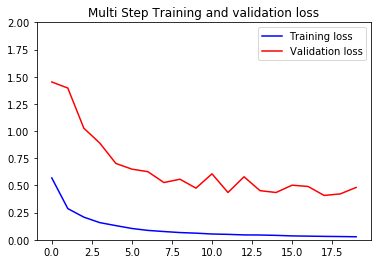

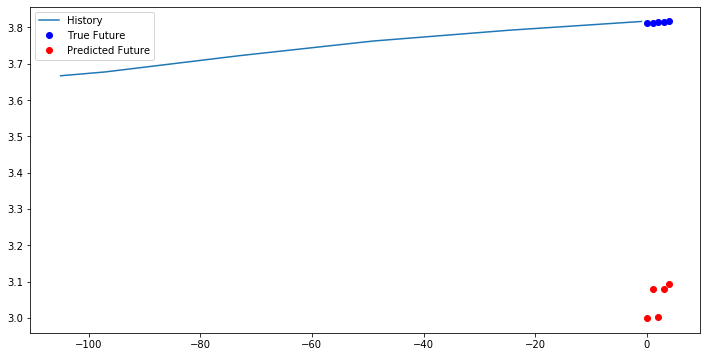

In [12]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  plt.ylim(ymax=2, ymin=0)
  plt.show()

plot_train_history(history, 'Multi Step Training and validation loss')

def plot_predict(dataset_scaled, model, target_column="confirmed"):
    dataset = dataset_scaled[target_column]
    plt.figure(figsize=(12, 6))
    series = dataset.tail(past+future_target)
    num_in = list(range(-(past+future_target),0))
    true_future = series[past:]
    X_predict = dataset_scaled.drop(columns=target_column).tail(past+future_target)[:past].values
    prediction = model.predict(np.reshape(X_predict, (1, past, dataset_scaled.shape[1] - 1)))[0]
    plt.plot(num_in, np.array(series), label='History')
    plt.plot(np.arange(future_target), np.array(true_future), 'bo', label='True Future')
    plt.plot(np.arange(future_target), np.array(prediction), 'ro', label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

plot_predict(dataset_scaled, model)